# Engineering Quantum Physics - Final Project
NCKUES N96131281

## Import

In [2]:
from qiskit_aer import AerSimulator
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_state_city,array_to_latex
from qiskit_experiments.library import StateTomography
from qiskit.quantum_info import DensityMatrix, partial_trace,state_fidelity,Pauli,SparsePauliOp,negativity,purity,Statevector,entropy
from qiskit_ibm_runtime import QiskitRuntimeService

import numpy as np
from numpy import pi
import math


In [3]:
# service = QiskitRuntimeService(
#     channel='ibm_quantum',
#     instance='ibm-q/open/main',
#     token='3cf0fe1ffee5e23249070e9f0dff02f52702e0a20d143908e40bda826e93de2e1066929c5a2ee2b3c1427616b534d26f67daa67b508098fd253793783e702132'
# )
# job = service.job('cxpm00gy1ae0008mxfdg')
# job_result = job.result()

## Set up oracle

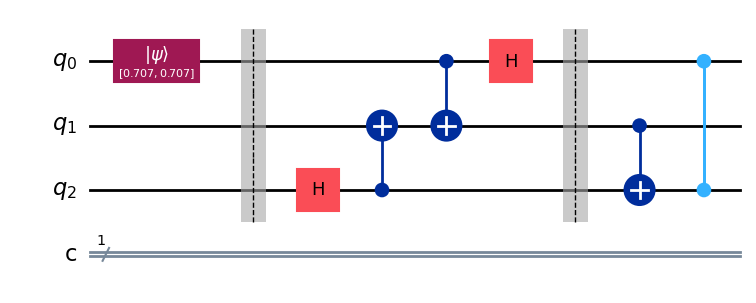

In [4]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(1, 'c')
qc = QuantumCircuit(qreg_q, creg_c)

# circuit.x(qreg_q[0])
qc.initialize([1/math.sqrt(2), 1/math.sqrt(2)],0)
# qc.initialize(1,0,0)
qc.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
qc.h(qreg_q[2])
qc.cx(qreg_q[2], qreg_q[1])
qc.cx(qreg_q[0], qreg_q[1])
qc.h(qreg_q[0])
qc.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
qc.cx(qreg_q[1], qreg_q[2])
qc.cz(qreg_q[0], qreg_q[2])
# qc.measure(qreg_q[2],creg_c)

qc.draw('mpl')

In [3]:

from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum", # ibm_cloud 
                            #    token = '3cf0fe1ffee5e23249070e9f0dff02f52702e0a20d143908e40bda826e93de2e1066929c5a2ee2b3c1427616b534d26f67daa67b508098fd253793783e702132')


In [4]:
backend = service.backend(name = "ibm_brisbane")
backend.num_qubits

127

In [5]:
# simulator = AerSimulator()

## 1. Quantum State Tomography

In [6]:
qstexp1 = StateTomography(qc)
qstdata1 = qstexp1.run(backend=backend).block_for_results()
# qstdata1 = qstexp1.run(backend=simulator).block_for_results()

# Print results
for result in qstdata1.analysis_results():
    print(result)

AnalysisResult
- name: state
- value: DensityMatrix([[0.09385851+0.j        , 0.06265598-0.03211127j,
                0.08361816+0.00858561j, 0.05072021-0.02060954j,
                0.05109999+0.00716146j, 0.03167725-0.01277669j,
                0.04858398-0.0116984j , 0.02478027-0.03155518j],
               [0.06265598+0.03211127j, 0.14127604+0.j        ,
                0.06427002+0.03745524j, 0.11584473+0.00048828j,
                0.04225667+0.01619466j, 0.07962375-0.00134277j,
                0.03967285+0.00054932j, 0.07775879-0.01999919j],
               [0.08361816-0.00858561j, 0.06427002-0.03745524j,
                0.10148112+0.j        , 0.05659315-0.03760444j,
                0.05546061-0.00380452j, 0.03967285-0.0166626j ,
                0.04674615-0.0189209j , 0.02142334-0.03474935j],
               [0.05072021+0.02060954j, 0.11584473-0.00048828j,
                0.05659315+0.03760444j, 0.12562391+0.j        ,
                0.0423584 +0.01226807j, 0.06998698-0.0006307j ,

In [7]:
# from qiskit_ibm_runtime import QiskitRuntimeService

# service = QiskitRuntimeService(
#     channel='ibm_quantum',
#     instance='ibm-q/open/main',
#     token='3cf0fe1ffee5e23249070e9f0dff02f52702e0a20d143908e40bda826e93de2e1066929c5a2ee2b3c1427616b534d26f67daa67b508098fd253793783e702132'
# )
# job = service.job('cxpm00gy1ae0008mxfdg')
# job_result = job.result()

In [8]:
state_result = qstdata1.analysis_results("state")
rho_plus = DensityMatrix.from_label('+')

Partial trace on q0 & q1

<class 'qiskit.quantum_info.states.densitymatrix.DensityMatrix'>


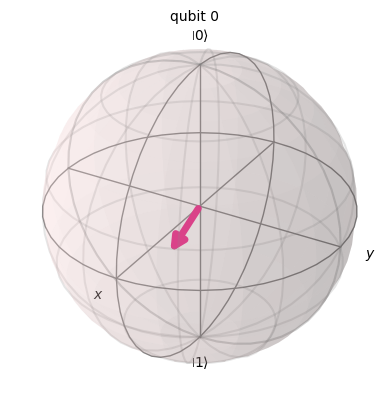

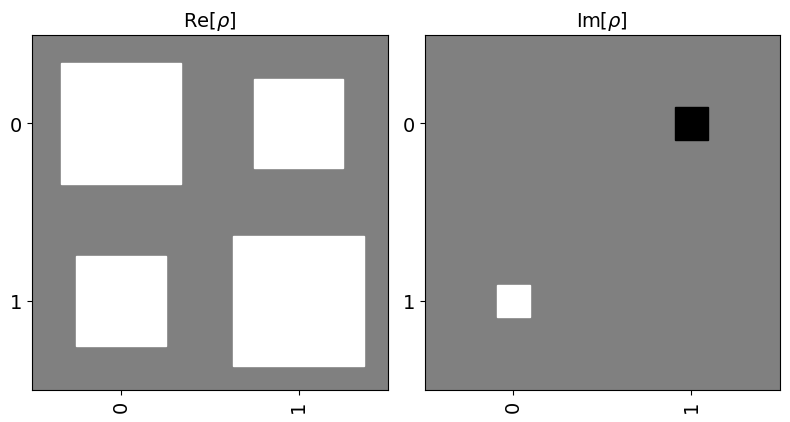

Density matrix rho after teleportation:


<IPython.core.display.Latex object>

In [29]:
rho_reduce = partial_trace(state_result.value, qargs=[0,1])
print(type(rho_reduce))

display(rho_reduce.draw("bloch"))
display(rho_reduce.draw('hinton'))
print("Density matrix rho after teleportation:")
display(array_to_latex(rho_reduce))

<class 'qiskit.quantum_info.states.densitymatrix.DensityMatrix'>


<IPython.core.display.Latex object>

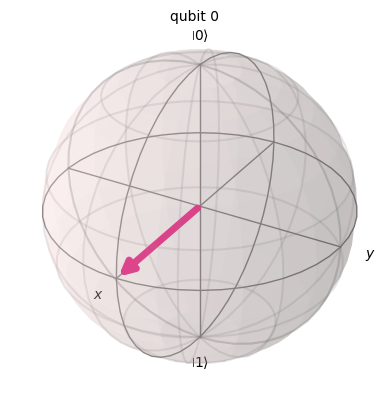

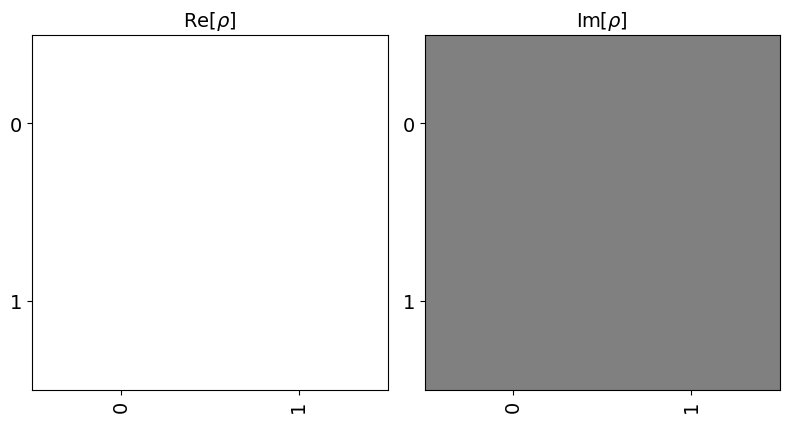

In [26]:
print(type(rho_plus))
display(rho_plus.draw('latex'))
display(rho_plus.draw('bloch'))
display(rho_plus.draw('hinton'))

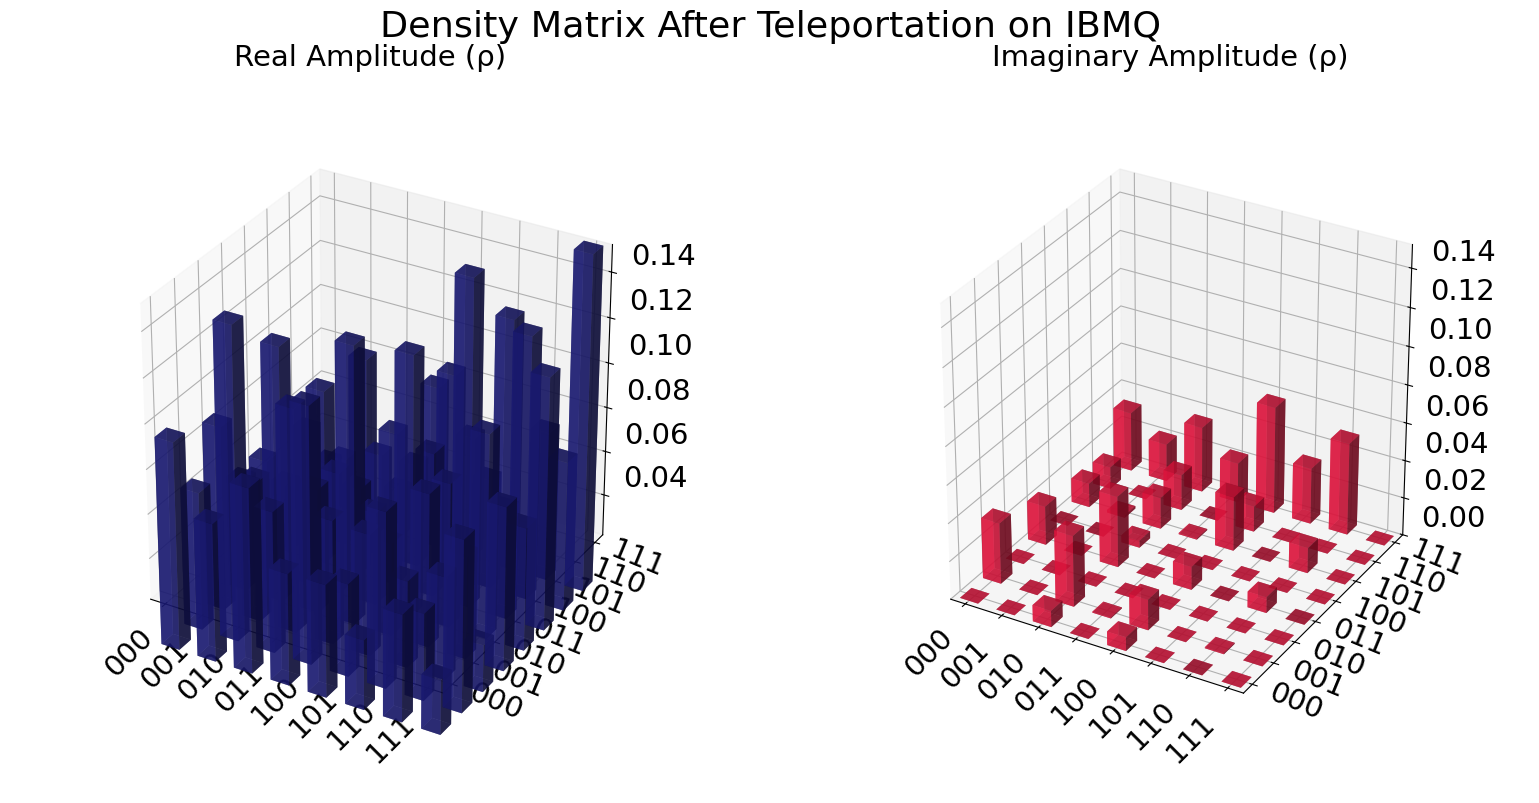

In [75]:
# 假設 state_result.value 包含密度矩陣數據
density_matrix = DensityMatrix(state_result.value)

# 將小於 0 的值設為 0
real_part = np.maximum(density_matrix.data.real, 0)  # 實部設置非負
imag_part = np.maximum(density_matrix.data.imag, 0)  # 虛部設置非負

# 生成一個新的密度矩陣物件
processed_matrix = DensityMatrix(real_part + 1j * imag_part)

# 使用 plot_state_city 繪製圖表
plot_state_city(processed_matrix, title='Density Matrix After Teleportation on IBMQ', color=['midnightblue', 'crimson'],alpha=0.7)

## Negativity , Purity , Entropy

In [61]:
print(f"The purity of a input ρ is{purity(rho_plus)}")
print(f"The purity of a output ρ is{purity(rho_reduce)}")

The purity of a input ρ is(0.9999999999999996+0j)
The purity of a output ρ is(0.6319576560715134+0j)


In [28]:
neg = negativity(state_result.value, qargs=[2])

print(f"Negativity of qubit q2: {neg}")
# print(f"Negativity of qubit q2: {neg}")

Negativity of qubit q2: 0.0025784721575329295


In [74]:
print(f"Von Neumonn entropy of 𝜌′ is:{entropy(rho_reduce)}")
print(f"Von Neumonn entropy of ρ is:{entropy(rho_plus)}")

Von Neumonn entropy of 𝜌′ is:0.80021747319261
Von Neumonn entropy of ρ is:1.4415419267167124e-15


## 2. Fidelity

https://docs.quantum.ibm.com/api/qiskit/quantum_info#qiskit.quantum_info.state_fidelity

In [11]:
Fidility=state_fidelity(rho_plus,rho_reduce)
print(f"Fidility between the ideal 𝜌 and the transported 𝜌′is {Fidility}")

Fidility between the ideal 𝜌 and the transported 𝜌′is 0.7517632447387177


In [ ]:
# qc.measure(2,0)

# # Transpile for simulator
# simulator = AerSimulator()
circ = transpile(qc, backend=backend)

# # Run and get counts
# result = simulator.run(circ,shots=2048).result()
counts = job_result.get_counts(circ)
plot_histogram(counts, title='quantum teleportation of Bob',color='gray')

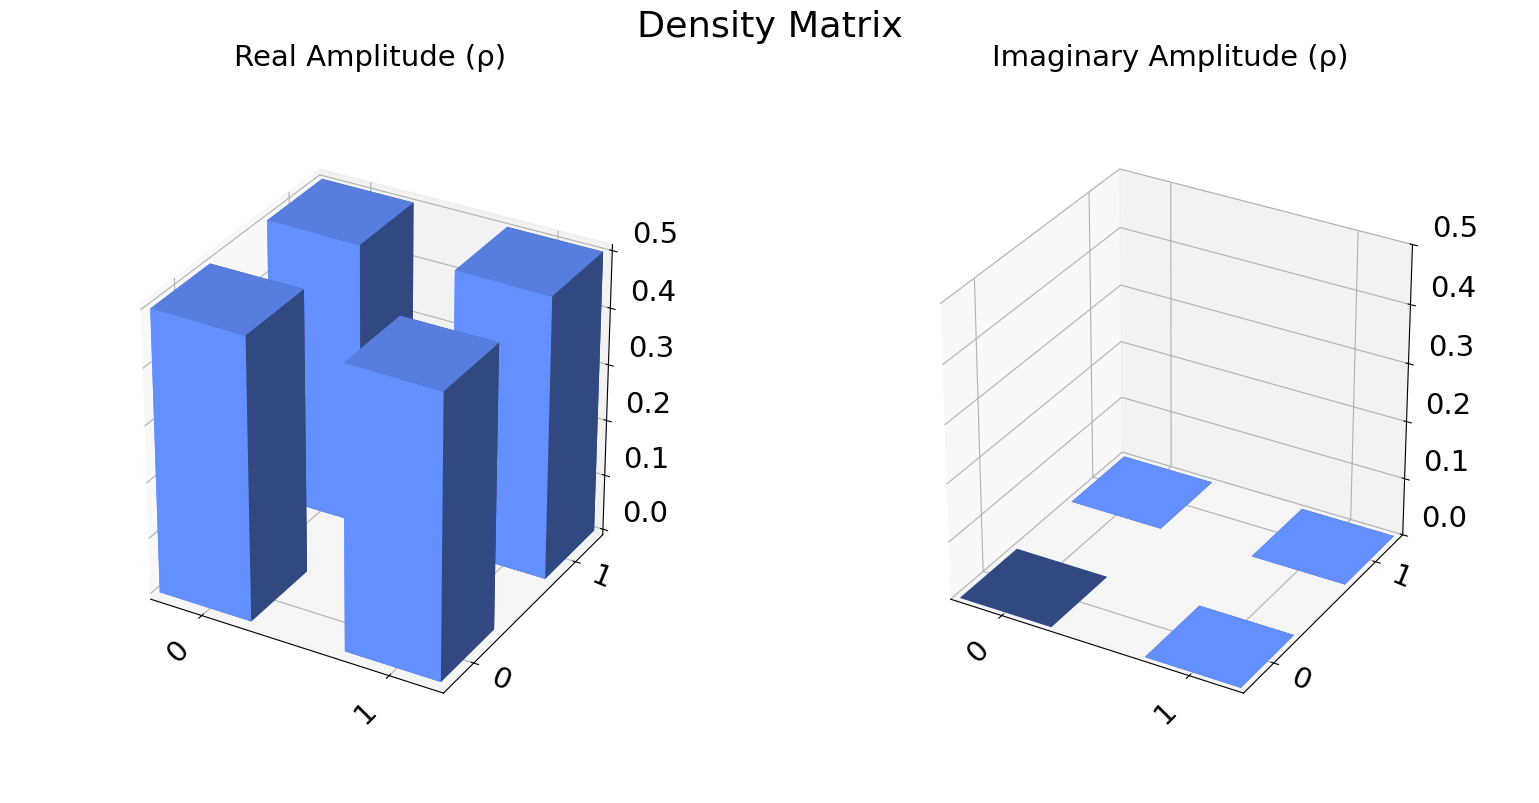

In [48]:
# state=DensityMatrix(qc)
plot_state_city(rho_plus,title='Density Matrix')

## 3. CHSH Inequality
https://learning.quantum.ibm.com/tutorial/chsh-inequality

$|\psi\rangle =\frac{|00\rangle + |11\rangle}{\sqrt{2}}$

In [15]:
psi = Statevector([1/np.sqrt(2),0,0,1/np.sqrt(2)])

In [16]:
Q = SparsePauliOp(["Z"])
R = SparsePauliOp(["X"])

S = SparsePauliOp(["Z", "X"], coeffs=[-1/np.sqrt(2), -1/np.sqrt(2)])
T = SparsePauliOp(["Z", "X"], coeffs=[1/np.sqrt(2), -1/np.sqrt(2)])

$\langle \hat{Q}\hat{S} \rangle = \langle \psi | (\hat{Q} \otimes \hat{S}) | \psi \rangle$

In [17]:
QS = Q.tensor(S)  # Q ⊗ S
RS = R.tensor(S)  # R ⊗ S
RT = R.tensor(T)  # R ⊗ T
QT = Q.tensor(T)  # Q ⊗ T

In [18]:
QS.to_matrix().shape

(4, 4)

Check if experiment on IBMQ violates: 

$| \langle QS \rangle + \langle RS \rangle + \langle RT \rangle - \langle QT \rangle | \leq 2$

In [19]:
qs_expectation = psi.expectation_value(QS)
rs_expectation = psi.expectation_value(RS)
rt_expectation = psi.expectation_value(RT)
qt_expectation = psi.expectation_value(QT)

CHSH_value = abs(qs_expectation + rs_expectation + rt_expectation - qt_expectation)

print("⟨QS⟩ =", qs_expectation)
print("⟨RS⟩ =", rs_expectation)
print("⟨RT⟩ =", rt_expectation)
print("⟨QT⟩ =", qt_expectation)
print("CHSH value =", CHSH_value)

⟨QS⟩ = (-0.7071067811865474+0j)
⟨RS⟩ = (-0.7071067811865474+0j)
⟨RT⟩ = (-0.7071067811865474+0j)
⟨QT⟩ = (0.7071067811865474+0j)
CHSH value = 2.8284271247461894
